In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from tqdm import tqdm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet


In [2]:
df = pd.read_csv('processed_data.csv')
df2= pd.read_csv('kingcountysales.csv')

In [3]:
df.head()

,sale_id,pinx,sale_date,sale_warning,join_status,latitude,city,zoning,stories,bath_half,...,bath_full_log,bath_3qtr_log,wfnt_log,view_olympics_log,view_cascades_log,view_territorial_log,view_skyline_log,view_sound_log,view_lakewash_log,view_lakesamm_log
0,1999..144,..2734100475,1999-01-05,0,demo,47.544359,SEATTLE,SF 5000,1.5,0,...,0.693147,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1999..258,..1535200725,1999-01-05,0,demo,47.421247,KING COUNTY,RA2.5P,1.0,0,...,0.693147,0.000000,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,0.0
2,1999..331,..6028000255,1999-01-04,0,demo,47.572103,KING COUNTY,R6,2.0,1,...,0.693147,0.693147,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,1999..660,..6145600690,1999-01-08,0,demo,47.703824,SEATTLE,SF 5000,1.0,0,...,0.693147,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1999..775,..1939800005,1999-01-07,0,demo,47.764482,BOTHELL,R15 OP,1.5,1,...,0.693147,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560219 entries, 0 to 560218
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sale_id               560219 non-null  object 
 1   pinx                  560219 non-null  object 
 2   sale_date             560219 non-null  object 
 3   sale_warning          560219 non-null  object 
 4   join_status           560219 non-null  object 
 5   latitude              560219 non-null  float64
 6   city                  560219 non-null  object 
 7   zoning                560219 non-null  object 
 8   stories               560219 non-null  float64
 9   bath_half             560219 non-null  int64  
 10  submarket             560219 non-null  object 
 11  sale_price_log        560219 non-null  float64
 12  sale_nbr_log          560219 non-null  float64
 13  join_year_log         560219 non-null  float64
 14  land_val_log          560219 non-null  float64
 15  

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560219 entries, 0 to 560218
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        560219 non-null  int64  
 1   sale_id           560219 non-null  object 
 2   pinx              560219 non-null  object 
 3   sale_date         560219 non-null  object 
 4   sale_price        560219 non-null  int64  
 5   sale_nbr          560219 non-null  int64  
 6   sale_warning      560219 non-null  object 
 7   join_status       560219 non-null  object 
 8   join_year         560219 non-null  int64  
 9   latitude          560219 non-null  float64
 10  longitude         560219 non-null  float64
 11  area              560219 non-null  int64  
 12  city              560219 non-null  object 
 13  zoning            560219 non-null  object 
 14  subdivision       510572 non-null  object 
 15  present_use       560219 non-null  int64  
 16  land_val          56

In [6]:
X = df.drop(columns=['sale_id','pinx','sale_date','sale_warning','sale_price_log','join_status','city','zoning'])
y = df['sale_price_log']
X2 = df2.drop(columns=['sale_id','pinx','sale_date','sale_warning','sale_price','join_status','city','zoning','subdivision'])
y2 = df2['sale_price']

In [7]:
X = pd.get_dummies(X, drop_first=True)

In [8]:
X2 = pd.get_dummies(X2, drop_first= True)

In [9]:
X_sub = X.sample(50000, random_state=42)
y_sub = y.loc[X_sub.index]

X_sub2 = X2.sample(50000, random_state=42)
y_sub2 = y2.loc[X_sub2.index]

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
r2 = make_scorer(r2_score)



In [12]:


models = {
    "Decision Tree": DecisionTreeRegressor(
        random_state=42,
        max_depth=30, 
        min_samples_split=50,
        min_samples_leaf=20
    ),
    "Random Forest": RandomForestRegressor(
        random_state=42,
        n_estimators=200,     
        max_depth=30,
        min_samples_split=50,
        min_samples_leaf=20,
        max_features='sqrt', #takes root of d total features, better generalziing
        bootstrap=True, # makes it random, for random sampling
        n_jobs=-1 #uses all cores for -1, only one for 1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        random_state=42,
        n_estimators=200,
        learning_rate=0.2,
        max_depth=3,
        min_samples_split=50,
        min_samples_leaf=20,
        subsample=0.8
    ),

    #Linear models
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=1.0))
    ]),
    "Lasso Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=0.01, max_iter=10000))
    ]),
    "ElasticNet Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("elastic", ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000))
    ]),

    #Polynomial models
    "Polynomial Regression (deg 2)": Pipeline([
        ("scaler", StandardScaler()),
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("linear_reg", LinearRegression())
    ]),
    "Polynomial Ridge (deg 2)": Pipeline([
        ("scaler", StandardScaler()),
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("ridge", Ridge(alpha=1.0))
    ]),
    # "Polynomial Lasso (deg 2)": Pipeline([
    #     ("scaler", StandardScaler()),
    #     ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    #     ("lasso", Lasso(alpha=0.01, max_iter=100000))
    # ]),
    # "Polynomial ElasticNet (deg 2)": Pipeline([
    #     ("scaler", StandardScaler()),
    #     ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    #     ("elastic", ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=100000))
    # ])
}

In [14]:
results = {}
results2= {}
for name, model in models.items():
    fold_scores = []
    print(f"\nTraining {name}...")
    for train_idx, test_idx in tqdm(kf.split(X_sub), total=kf.get_n_splits()):
        X_train, X_test = X_sub.iloc[train_idx], X_sub.iloc[test_idx]
        y_train, y_test = y_sub.iloc[train_idx], y_sub.iloc[test_idx]
        
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)  # R² by default
        fold_scores.append(score)
    
    results[name] = {
        "R2 Mean": np.mean(fold_scores),
        "R2 Std": np.std(fold_scores)
    }

results_df = pd.DataFrame(results).T
print(results_df)

#full dataset
for name, model in models.items():
    fold_scores = []
    print(f"\nTraining {name}...")
    for train_idx, test_idx in tqdm(kf.split(X_sub2), total=kf.get_n_splits()):
        X_train, X_test = X_sub2.iloc[train_idx], X_sub2.iloc[test_idx]
        y_train, y_test = y_sub2.iloc[train_idx], y_sub2.iloc[test_idx]
        
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)  # R² by default
        fold_scores.append(score)
    
    results2[name] = {
        "R2 Mean": np.mean(fold_scores),
        "R2 Std": np.std(fold_scores)
    }

results_df2 = pd.DataFrame(results2).T
print("original dataset: \n",results_df2)




Training Decision Tree...


100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  3.97it/s]



Training Random Forest...


100%|█████████████████████████████████████████████| 5/5 [00:05<00:00,  1.10s/it]



Training Gradient Boosting...


100%|█████████████████████████████████████████████| 5/5 [00:52<00:00, 10.54s/it]



Training Linear Regression...


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 12.40it/s]



Training Ridge Regression...


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 18.12it/s]



Training Lasso Regression...


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 13.03it/s]



Training ElasticNet Regression...


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  7.44it/s]



Training Polynomial Regression (deg 2)...


100%|█████████████████████████████████████████████| 5/5 [00:12<00:00,  2.55s/it]



Training Polynomial Ridge (deg 2)...


100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.71it/s]


                                R2 Mean    R2 Std
Decision Tree                  0.532867  0.007880
Random Forest                  0.583103  0.006721
Gradient Boosting              0.612740  0.005948
Linear Regression              0.552366  0.006069
Ridge Regression               0.552366  0.006069
Lasso Regression               0.541160  0.005808
ElasticNet Regression          0.548266  0.005776
Polynomial Regression (deg 2)  0.602210  0.005015
Polynomial Ridge (deg 2)       0.602175  0.005021

Training Decision Tree...


100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.27it/s]



Training Random Forest...


100%|█████████████████████████████████████████████| 5/5 [00:08<00:00,  1.71s/it]



Training Gradient Boosting...


100%|█████████████████████████████████████████████| 5/5 [01:24<00:00, 16.88s/it]



Training Linear Regression...


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  8.97it/s]



Training Ridge Regression...


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 15.01it/s]



Training Lasso Regression...


100%|█████████████████████████████████████████████| 5/5 [00:04<00:00,  1.21it/s]



Training ElasticNet Regression...


100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.53it/s]



Training Polynomial Regression (deg 2)...


100%|█████████████████████████████████████████████| 5/5 [00:34<00:00,  6.97s/it]



Training Polynomial Ridge (deg 2)...


100%|█████████████████████████████████████████████| 5/5 [00:08<00:00,  1.77s/it]

original dataset: 
                                 R2 Mean    R2 Std
Decision Tree                  0.731628  0.018818
Random Forest                  0.634104  0.027600
Gradient Boosting              0.843763  0.026056
Linear Regression              0.539007  0.023285
Ridge Regression               0.539008  0.023286
Lasso Regression               0.539007  0.023285
ElasticNet Regression          0.539040  0.023380
Polynomial Regression (deg 2)  0.612980  0.025481
Polynomial Ridge (deg 2)       0.613390  0.025410



=== LEARNING CURVES ===
Learning curve for Decision Tree...


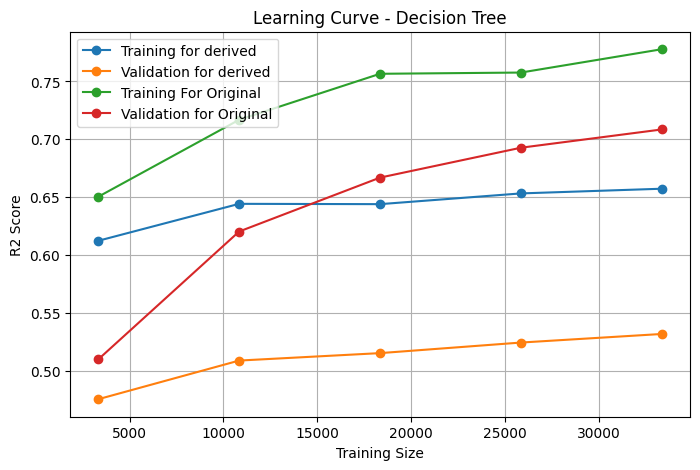

Learning curve for Random Forest...


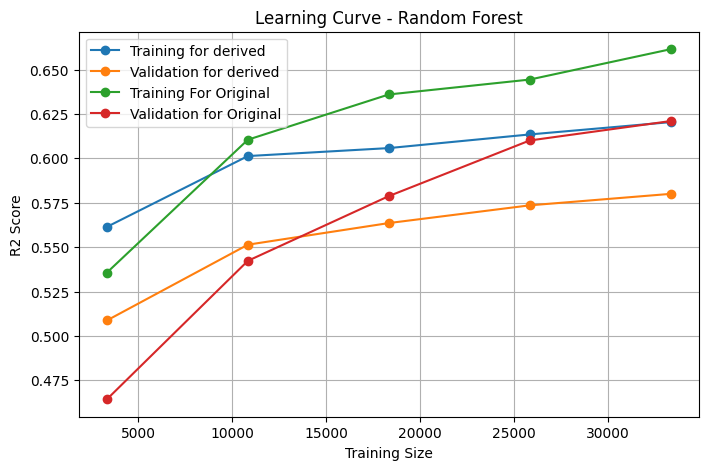

Learning curve for Gradient Boosting...


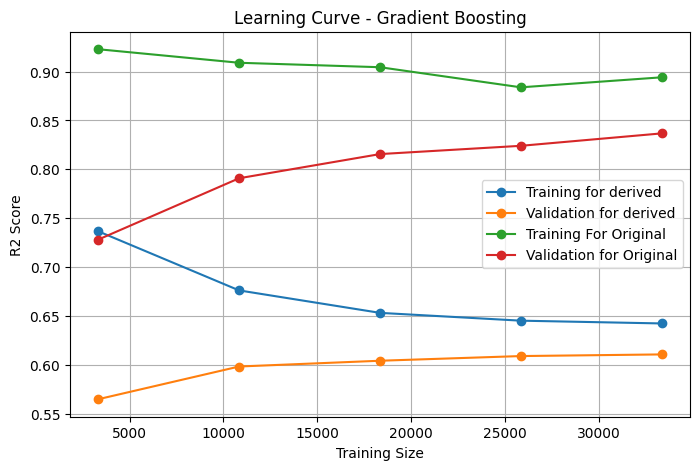

Learning curve for Linear Regression...


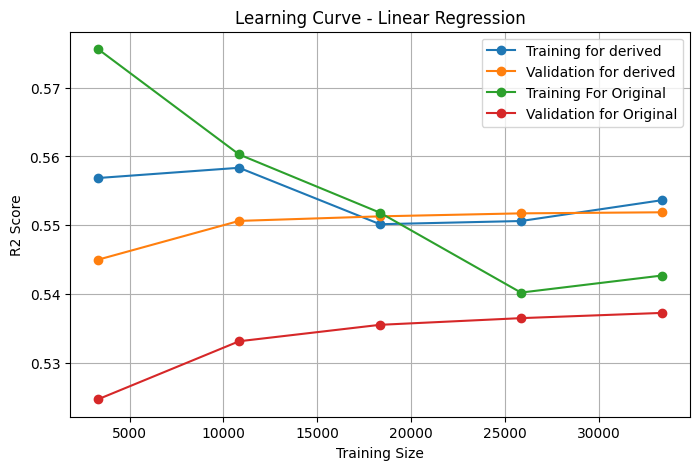

Learning curve for Ridge Regression...


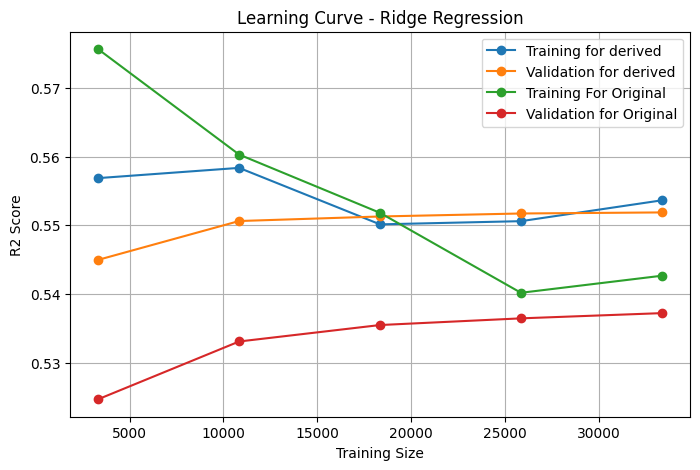

Learning curve for Lasso Regression...


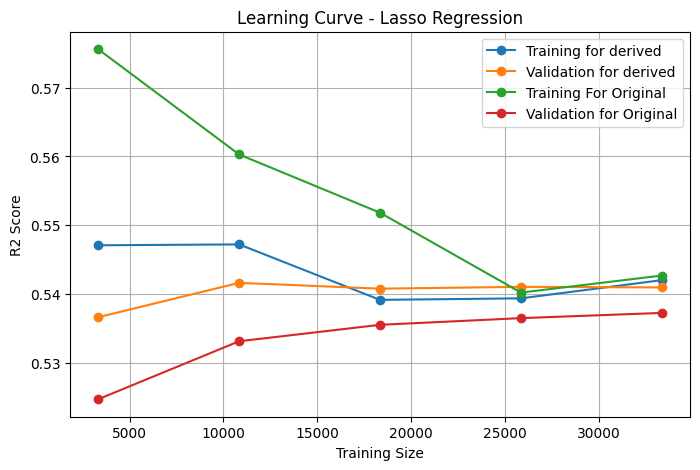

Learning curve for ElasticNet Regression...


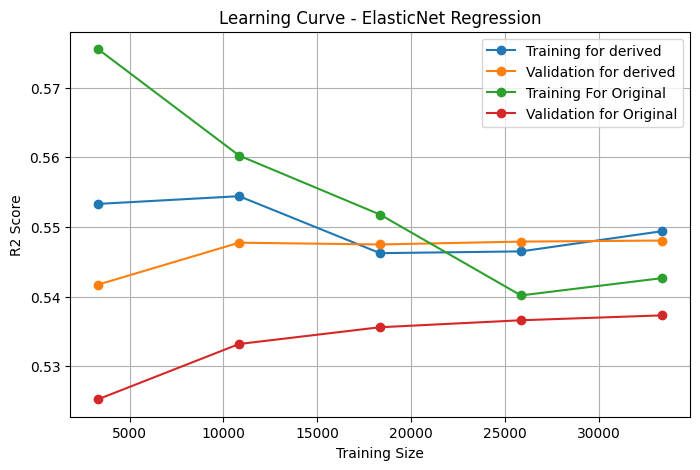

Learning curve for Polynomial Regression (deg 2)...


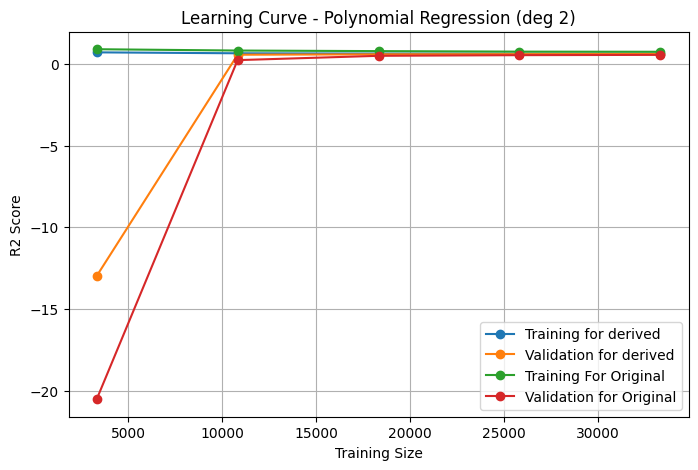

Learning curve for Polynomial Ridge (deg 2)...


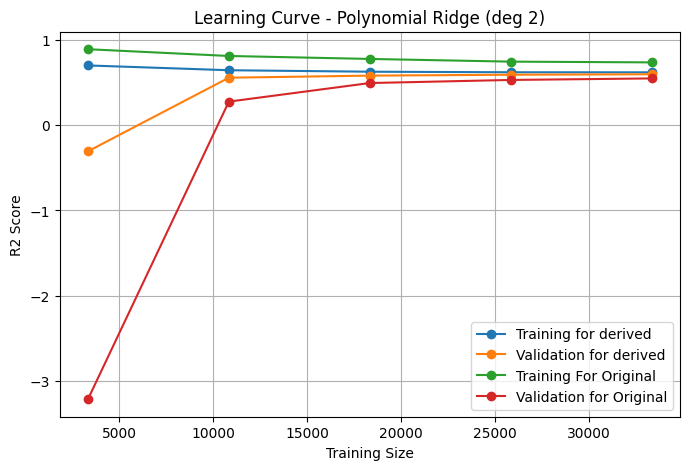

In [13]:
print("\n=== LEARNING CURVES ===")
for name, model in models.items():
    print(f"Learning curve for {name}...")
    
    # Simple learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_sub, y_sub, cv=3, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_sizes2, train_scores2, val_scores2 = learning_curve(
        model, X_sub2, y_sub2, cv=3, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    # Plot it
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training for derived')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label='Validation for derived')
    plt.plot(train_sizes2, np.mean(train_scores2, axis=1), 'o-', label='Training For Original')
    plt.plot(train_sizes2, np.mean(val_scores2, axis=1), 'o-', label='Validation for Original')
    plt.title(f'Learning Curve - {name}')
    plt.xlabel('Training Size')
    plt.ylabel('R2 Score')
    plt.legend()
    plt.grid(True)
    plt.show()

Validation curve for Decision Tree...


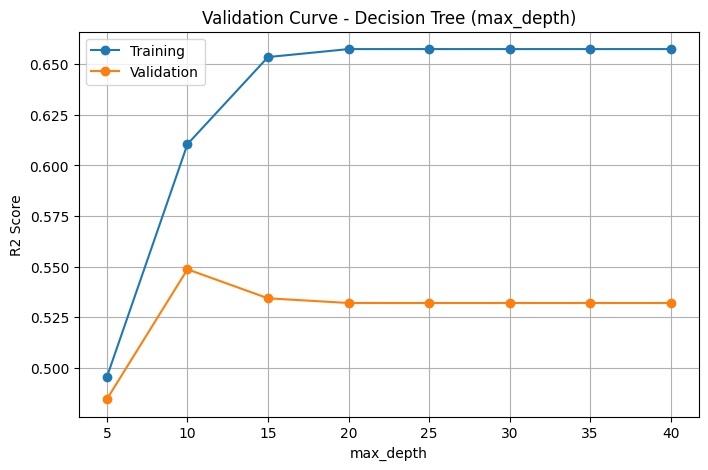

Validation curve for Random Forest...


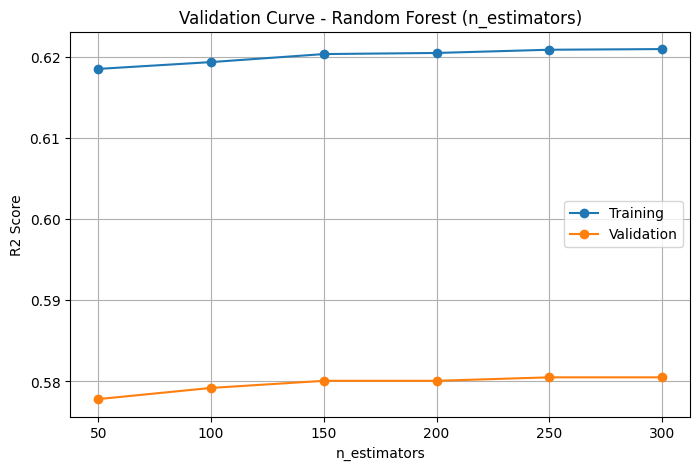

Validation curve for Gradient Boosting...


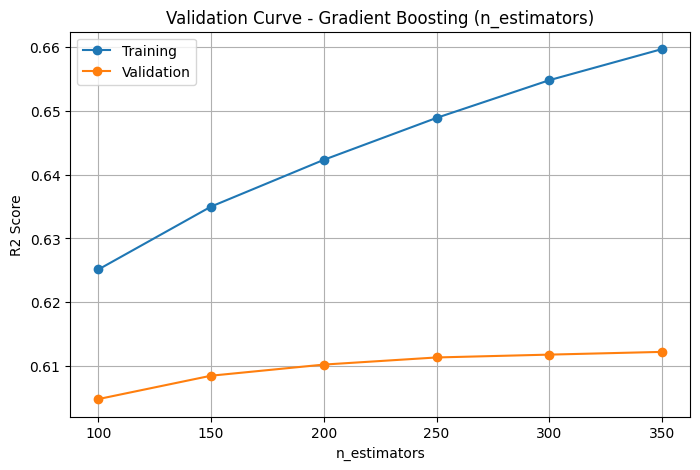

Validation curve for Polynomial Regression (deg 2)...


In [ ]:
validation_params = {
    "Decision Tree": {"param_name": "max_depth", "param_range": [5, 10, 15, 20, 25, 30, 35, 40]},
    "Random Forest": {"param_name": "n_estimators", "param_range": [50, 100, 150, 200, 250, 300]},
    "Gradient Boosting": {"param_name": "n_estimators", "param_range": [100, 150, 200, 250, 300, 350]},
    "Polynomial Regression (deg 2)": {"param_name": "poly_features__degree", "param_range": [1, 2, 3]}
}

for name, model in models.items():
    if name in validation_params:  # Only for models we defined parameters for
        print(f"Validation curve for {name}...")
        
        param_name = validation_params[name]["param_name"]
        param_range = validation_params[name]["param_range"]
        
        train_scores, val_scores = validation_curve(
            model, X_sub, y_sub, param_name=param_name, param_range=param_range, cv=3
        )
        
        plt.figure(figsize=(8, 5))
        plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', label='Training')
        plt.plot(param_range, np.mean(val_scores, axis=1), 'o-', label='Validation')
        plt.title(f'Validation Curve - {name} ({param_name})')
        plt.xlabel(param_name)
        plt.ylabel('R2 Score')
        plt.legend()
        plt.grid(True)
        plt.show()